In [5]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.patches import Circle
from humanfriendly import format_size, format_timespan
import seaborn as sns

In [6]:
plt.style.use("seaborn-v0_8-whitegrid")
FIGSIZE = (13, 8)
DPI = 300
# https://jfly.uni-koeln.de/color/#cudo
# https://nanx.me/oneclust/reference/cud.html
cud = ["#000000", "#e69f00", "#56b4e9", "#009e73", "#f0e442", "#0072b2", "#d55e00", "#cc79a7"]
PALETTE = cud

In [7]:
uncompressed_size = {}
for p in Path("../../results/data/").rglob("*.size"):
    size = int(p.read_text().strip())
    acc = p.name.split(".")[0]
    uncompressed_size[acc] = size

In [8]:
data = []
for p in Path("../../results/compress/").rglob("*.size"):
    acc = p.name.split(".")[0]
    lvl = int(p.parts[-3])
    tech = p.parts[-2]
    tool = p.parts[-4]
    size = int(p.read_text().strip())
    ratio = size / uncompressed_size[acc]
    data.append((acc, lvl, tech, tool, size, ratio))
size_df = pd.DataFrame(data, columns=["accession", "level", "technology", "tool", "size", "compress_ratio"]).set_index(["accession", "technology", "tool", "level"], drop=False, verify_integrity=True)
size_df

,,,,accession,level,technology,tool,size,compress_ratio
accession,technology,tool,level,,,,,,
SRR22859722,illumina,gzip,9,SRR22859722,9,illumina,gzip,337490615,0.247215
SRR077288,illumina,gzip,9,SRR077288,9,illumina,gzip,2132448334,0.256843
SRR24015952,illumina,gzip,9,SRR24015952,9,illumina,gzip,83606018,0.205024
ERR9030317,illumina,gzip,9,ERR9030317,9,illumina,gzip,149571819,0.231829
ERR1023775,illumina,gzip,9,ERR1023775,9,illumina,gzip,189114319,0.114913
...,...,...,...,...,...,...,...,...,...
SRR11038964,nanopore,bzip2,5,SRR11038964,5,nanopore,bzip2,1379895180,0.454214
ERR9030439,nanopore,bzip2,5,ERR9030439,5,nanopore,bzip2,551292564,0.385259
SRR24283715,nanopore,bzip2,5,SRR24283715,5,nanopore,bzip2,1903651875,0.392346


In [9]:
mode = "compress"
frames = []
for p in Path(f"../../results/benchmark/{mode}").rglob("*.tsv"):
    acc = p.name.split(".")[0]
    lvl = int(p.parts[-3])
    tech = p.parts[-2]
    tool = p.parts[-4]
    subdf = pd.read_csv(p, sep="\t")
    keep = ["s", "max_rss"]
    subdf = subdf[keep]
    subdf.rename(columns={"s": f"{mode}_secs", "max_rss": f"{mode}_max_rss"}, inplace=True)
    subdf["tool"] = tool
    subdf["accession"] = acc
    subdf["technology"] = tech
    subdf["level"] = lvl
    subdf[f"{mode}_rate"] = uncompressed_size[acc] / subdf[f"{mode}_secs"][0]
    frames.append(subdf)
compress_frame = pd.concat(frames).set_index(["accession", "technology", "tool", "level"], drop=False, verify_integrity=True)
compress_frame

,,,,compress_secs,compress_max_rss,tool,accession,technology,level,compress_rate
accession,technology,tool,level,,,,,,,
SRR098024,illumina,gzip,9,12923.9669,6.16,gzip,SRR098024,illumina,9,3.996689e+06
SRR22859722,illumina,gzip,9,717.4499,6.17,gzip,SRR22859722,illumina,9,1.902811e+06
ERR2935805,illumina,gzip,9,15733.3025,2.96,gzip,ERR2935805,illumina,9,1.655457e+06
SRR11038976,illumina,gzip,9,216.8448,2.96,gzip,SRR11038976,illumina,9,3.216799e+06
SRR24015952,illumina,gzip,9,123.2936,2.96,gzip,SRR24015952,illumina,9,3.307435e+06
...,...,...,...,...,...,...,...,...,...,...
SRR24015950,nanopore,bzip2,5,473.9895,6.61,bzip2,SRR24015950,nanopore,5,1.358398e+07
SRR11038964,nanopore,bzip2,5,232.3900,6.13,bzip2,SRR11038964,nanopore,5,1.307278e+07
SRR13044184,nanopore,bzip2,5,630.1808,6.61,bzip2,SRR13044184,nanopore,5,1.362461e+07


In [10]:
mode = "decompress"
frames = []
for p in Path(f"../../results/benchmark/{mode}").rglob("*.tsv"):
    acc = p.name.split(".")[0]
    lvl = int(p.parts[-3])
    tech = p.parts[-2]
    tool = p.parts[-4]
    subdf = pd.read_csv(p, sep="\t")
    keep = ["s", "max_rss"]
    subdf = subdf[keep]
    subdf.rename(columns={"s": f"{mode}_secs", "max_rss": f"{mode}_max_rss"}, inplace=True)
    subdf["tool"] = tool
    subdf["accession"] = acc
    subdf["technology"] = tech
    subdf["level"] = lvl
    subdf[f"{mode}_rate"] = uncompressed_size[acc] / subdf[f"{mode}_secs"][0]
    frames.append(subdf)
decompress_frame = pd.concat(frames).set_index(["accession", "technology", "tool", "level"], drop=False, verify_integrity=True)
decompress_frame

,,,,decompress_secs,decompress_max_rss,tool,accession,technology,level,decompress_rate
accession,technology,tool,level,,,,,,,
SRR098024,illumina,gzip,9,340.1545,2.78,gzip,SRR098024,illumina,9,1.518518e+08
SRR22859722,illumina,gzip,9,8.7825,4.04,gzip,SRR22859722,illumina,9,1.554422e+08
ERR2935805,illumina,gzip,9,148.4291,2.79,gzip,ERR2935805,illumina,9,1.754764e+08
SRR11038976,illumina,gzip,9,4.1868,4.04,gzip,SRR11038976,illumina,9,1.666060e+08
SRR24015952,illumina,gzip,9,2.6075,2.77,gzip,SRR24015952,illumina,9,1.563895e+08
...,...,...,...,...,...,...,...,...,...,...
SRR24015950,nanopore,bzip2,5,295.8987,4.44,bzip2,SRR24015950,nanopore,5,2.175969e+07
SRR11038964,nanopore,bzip2,5,139.2559,4.44,bzip2,SRR11038964,nanopore,5,2.181583e+07
SRR13044184,nanopore,bzip2,5,363.2403,4.44,bzip2,SRR13044184,nanopore,5,2.363716e+07


In [11]:
df = compress_frame.combine_first(decompress_frame).combine_first(size_df)
df

accession  compress_max_rss   
accession   technology tool  level                                  
ERR1023775  illumina   bzip2 1       ERR1023775              4.04  \
                             2       ERR1023775              4.11   
                             3       ERR1023775              4.77   
                             4       ERR1023775              5.43   
                             5       ERR1023775              6.11   
...                                         ...               ...   
SRR24283718 illumina   zstd  15     SRR24283718            133.15   
                             16     SRR24283718            101.13   
                             17     SRR24283718            182.79   
                             18     SRR24283718            183.71   
                             19     SRR24283718            215.77   

                                    compress_rate  compress_ratio   
accession   technology tool  level                                  
ERR1023775  illumina   bzip2 1       1.726007e+07        0.102203  \
                             2       1.794144e+07        0.098728   
                             3       1.727944e+07        0.097552   
                             4       1.673412e+07        0.097001   
                             5       1.676137e+07        0.096612   
...                                           ...             ...   
SRR24283718 illumina   zstd  15      2.895650e+06        0.119993   
                             16      2.838569e+06        0.118551   
                             17      2.052394e+06        0.109321   
                             18      2.214184e+06        0.107998   
                             19      1.685481e+06             NaN   

                                    compress_secs  decompress_max_rss   
accession   technology tool  level                                      
ERR1023775  illumina   bzip2 1            95.3486                4.04  \
                             2            91.7275                3.28   
                             3            95.2417                6.17   
                             4            98.3454                4.05   
                             5            98.1855                4.43   
...                                           ...                 ...   
SRR24283718 illumina   zstd  15         1188.4048                7.16   
                             16         1212.3024                7.17   
                             17         1676.6785               11.16   
                             18         1554.1637               11.21   
                             19         2041.6748               11.21   

                                    decompress_rate  decompress_secs  level   
accession   technology tool  level                                            
ERR1023775  illumina   bzip2 1         6.775565e+07          24.2891      1  \
                             2         6.495491e+07          25.3364      2   
                             3         5.901655e+07          27.8858      3   
                             4         5.077451e+07          32.4124      4   
                             5         5.779843e+07          28.4735      5   
...                                             ...              ...    ...   
SRR24283718 illumina   zstd  15        5.141036e+08           6.6936     15   
                             16        7.279582e+08           4.7272     16   
                             17        4.904795e+08           7.0160     17   
                             18        5.028133e+08           6.8439     18   
                             19        4.868985e+08           7.0676     19   

                                           size technology   tool  
accession   technology tool  level                                 
ERR1023775  illumina   bzip2 1      168198703.0   illumina  bzip2  
                             2      162479453.0   illumina  

In [12]:
default_lvl = {"gzip": 6, "zstd": 3, "bzip2": 9, "xz": 6}
hue_order = sorted(default_lvl)
style_order = ["illumina", "nanopore"]

# Compression ratio

/var/folders/0g/3ywwrf6j2vjbp0r780dskt980000gn/T/ipykernel_41634/112173193.py:3: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(


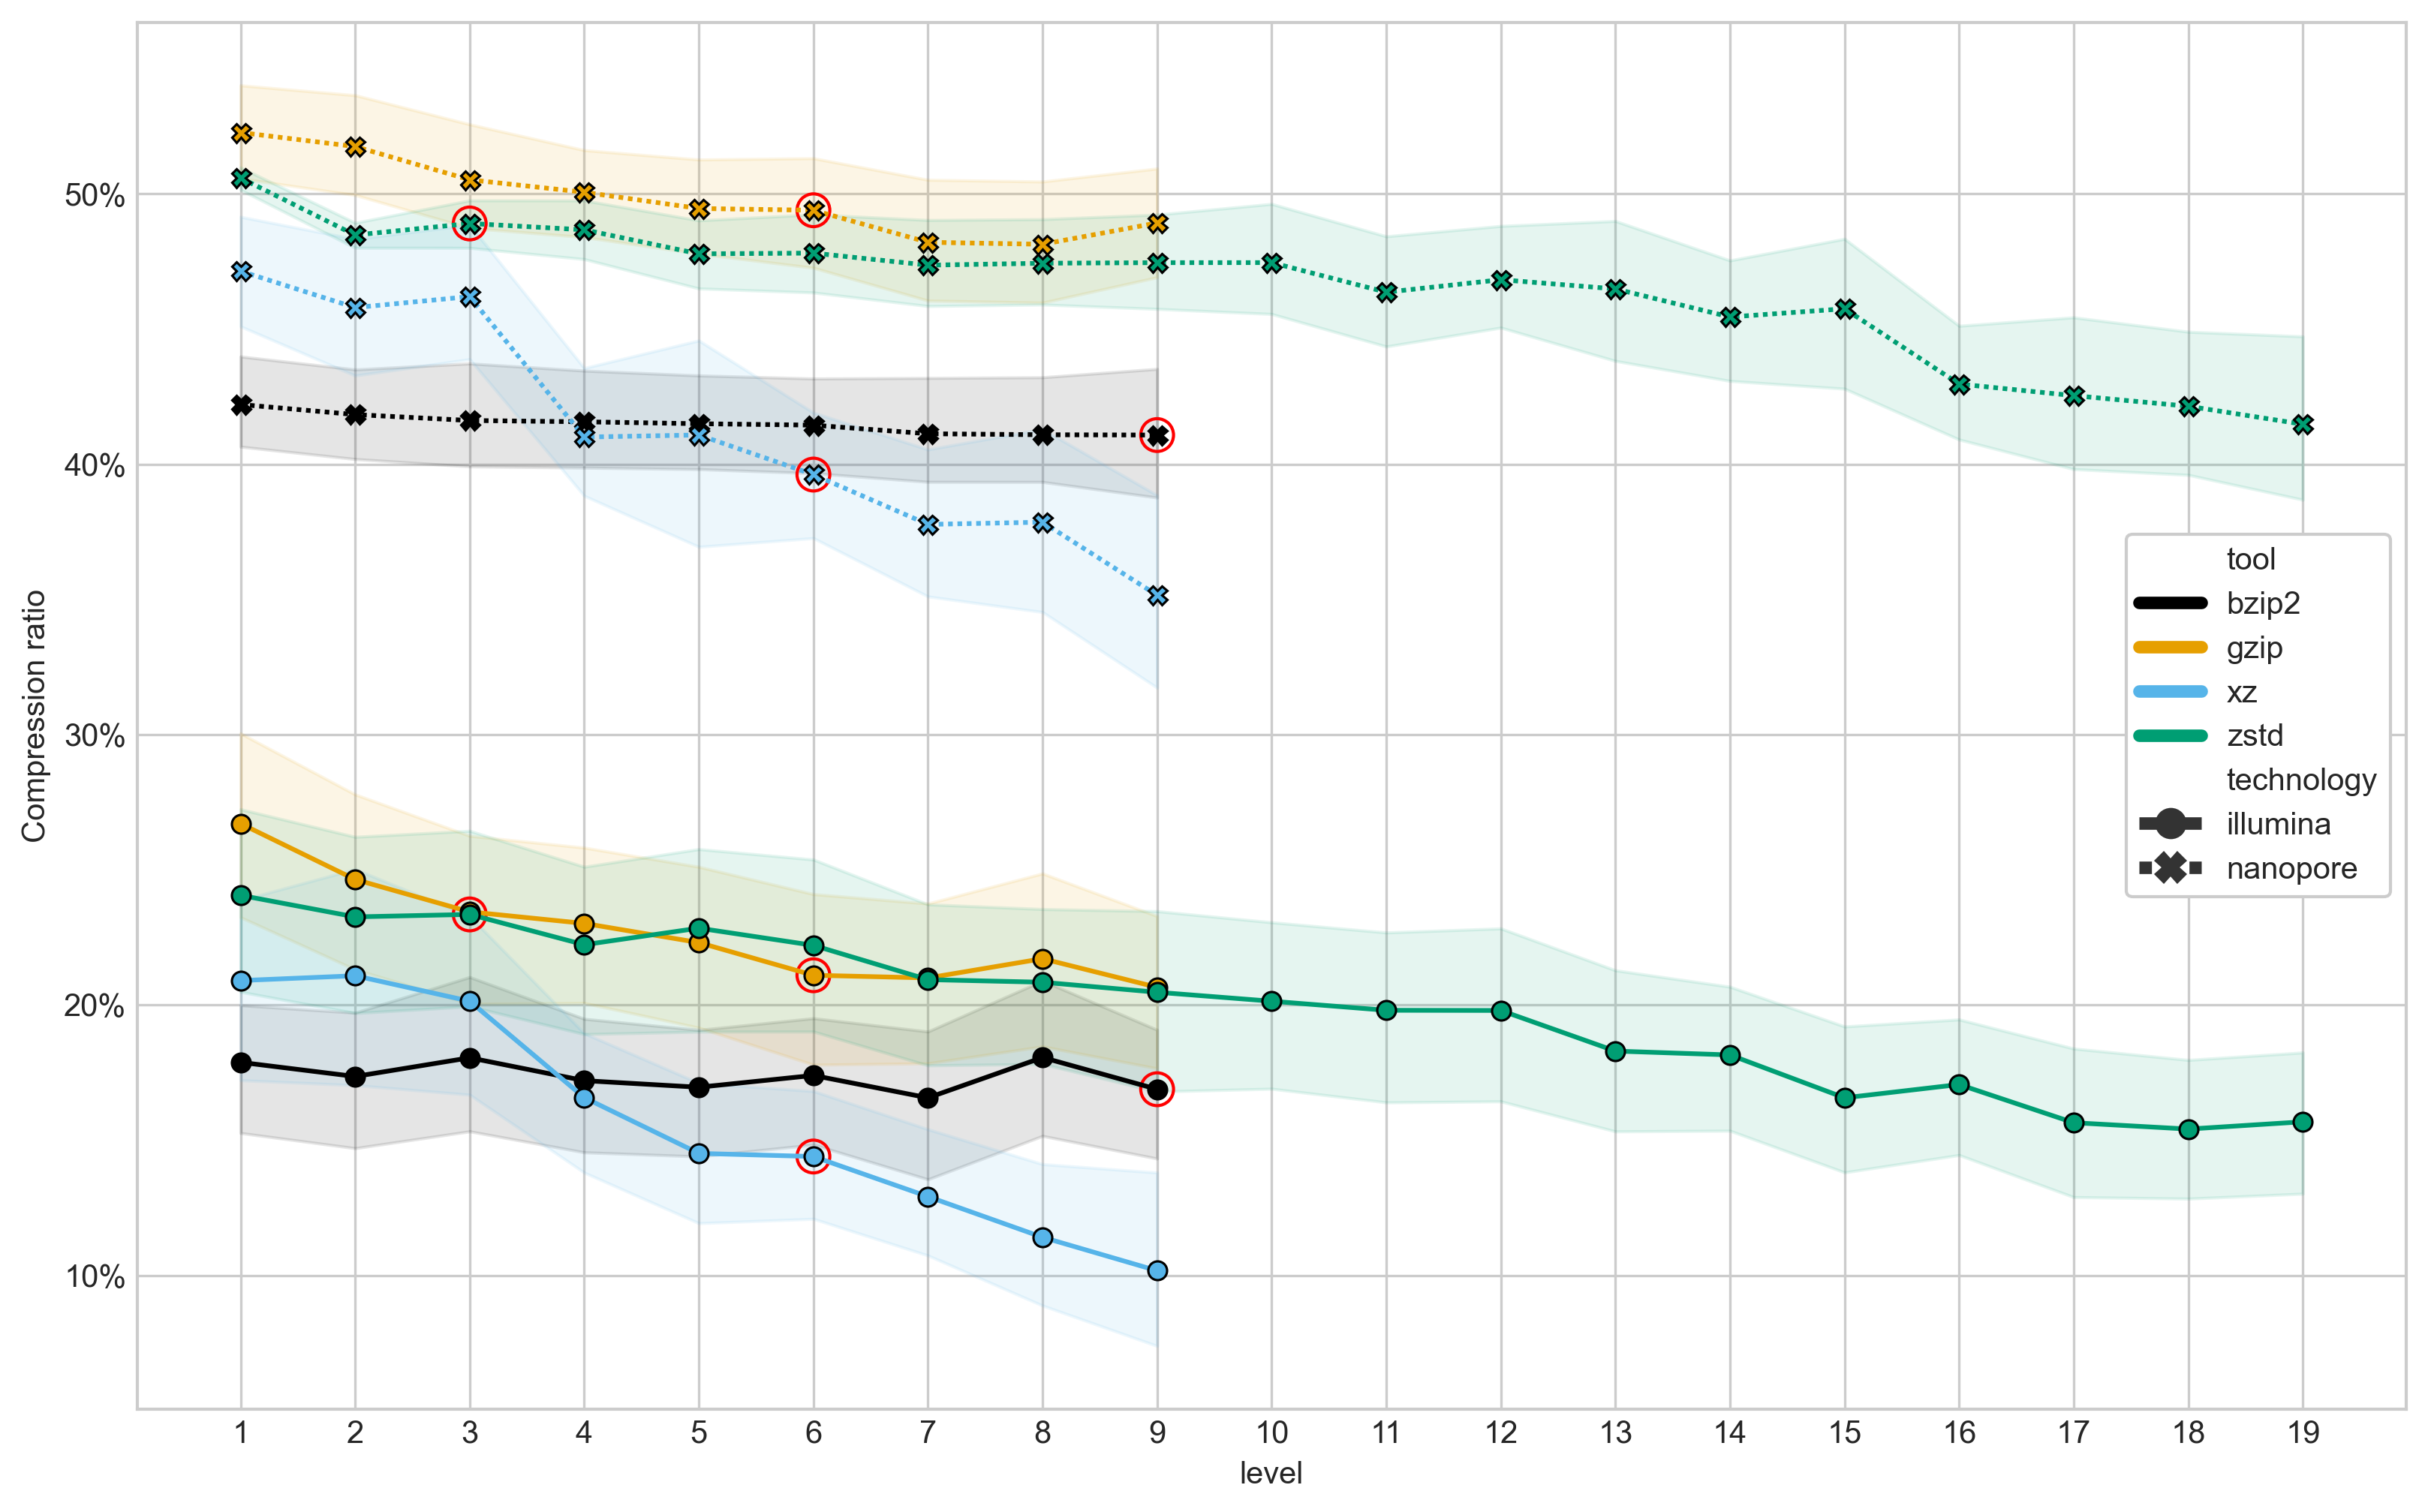

In [36]:
fig, ax = plt.subplots(dpi=DPI, figsize=FIGSIZE)
data = df#.query("technology=='nanopore'")
sns.lineplot(
    data=data, 
    x="level", 
    y="compress_ratio", 
    hue="tool", 
    hue_order=hue_order,
    style="technology",
    style_order=style_order,
    palette=PALETTE,
    markers=True,
    ax=ax,
    dashes=[(1, 0), (1, 1)],
    mec="black",
    err_kws={"alpha": 0.1}
)
xticks = list(range(1, 20))
_ = ax.set_xticks(xticks)



yticks = [s.get_position()[-1] for s in ax.get_yticklabels()]
# ylabels = [format_size(s) for s in yticks]
# ax.set_yticklabels(ylabels)
ax.set_ylabel("Compression ratio")
ax.yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))

# add secondary axis to right of plot

# acc = list(set(data["accession"]))[0]
# uncompressed = uncompressed_size[acc]
# secyticks = [y / uncompressed for y in yticks]
# secax = ax.secondary_yaxis('right', functions=(lambda arr: arr / uncompressed, lambda arr: arr* uncompressed))
# # secax.set_yticks(secyticks)
# # secax.set_yticklabels(secyticks)
# secax.set_ylabel('Proportion of original size', rotation=270, labelpad=15)
leg = ax.legend(loc="center right", framealpha=1, frameon=True, markerscale=1.5)
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4.0)
        
# ax.tick_params(axis="x", bottom=True, rotation=270)
# secax.minorticks_off()

for (tool, lvl) in default_lvl.items():
    for t in set(df["technology"]):
        mean = df.query("tool==@tool and level==@lvl and technology==@t")["compress_ratio"].mean()
        ax.scatter(lvl, mean, s=110, fc='None', ec="red")

In [42]:
def format_time(s):
    time, unit = s.split()
    if unit.startswith("min"):
        return f"{time} min"
    elif unit.startswith("hou"):
        return f"{time} hr"

/var/folders/0g/3ywwrf6j2vjbp0r780dskt980000gn/T/ipykernel_41634/2118741739.py:5: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(
/var/folders/0g/3ywwrf6j2vjbp0r780dskt980000gn/T/ipykernel_41634/2118741739.py:5: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(
/var/folders/0g/3ywwrf6j2vjbp0r780dskt980000gn/T/ipykernel_41634/2118741739.py:5: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(
/var/folders/0g/3ywwrf6j2vjbp0r780dskt980000gn/T/ipykernel_41634/2118741739.py:5: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(


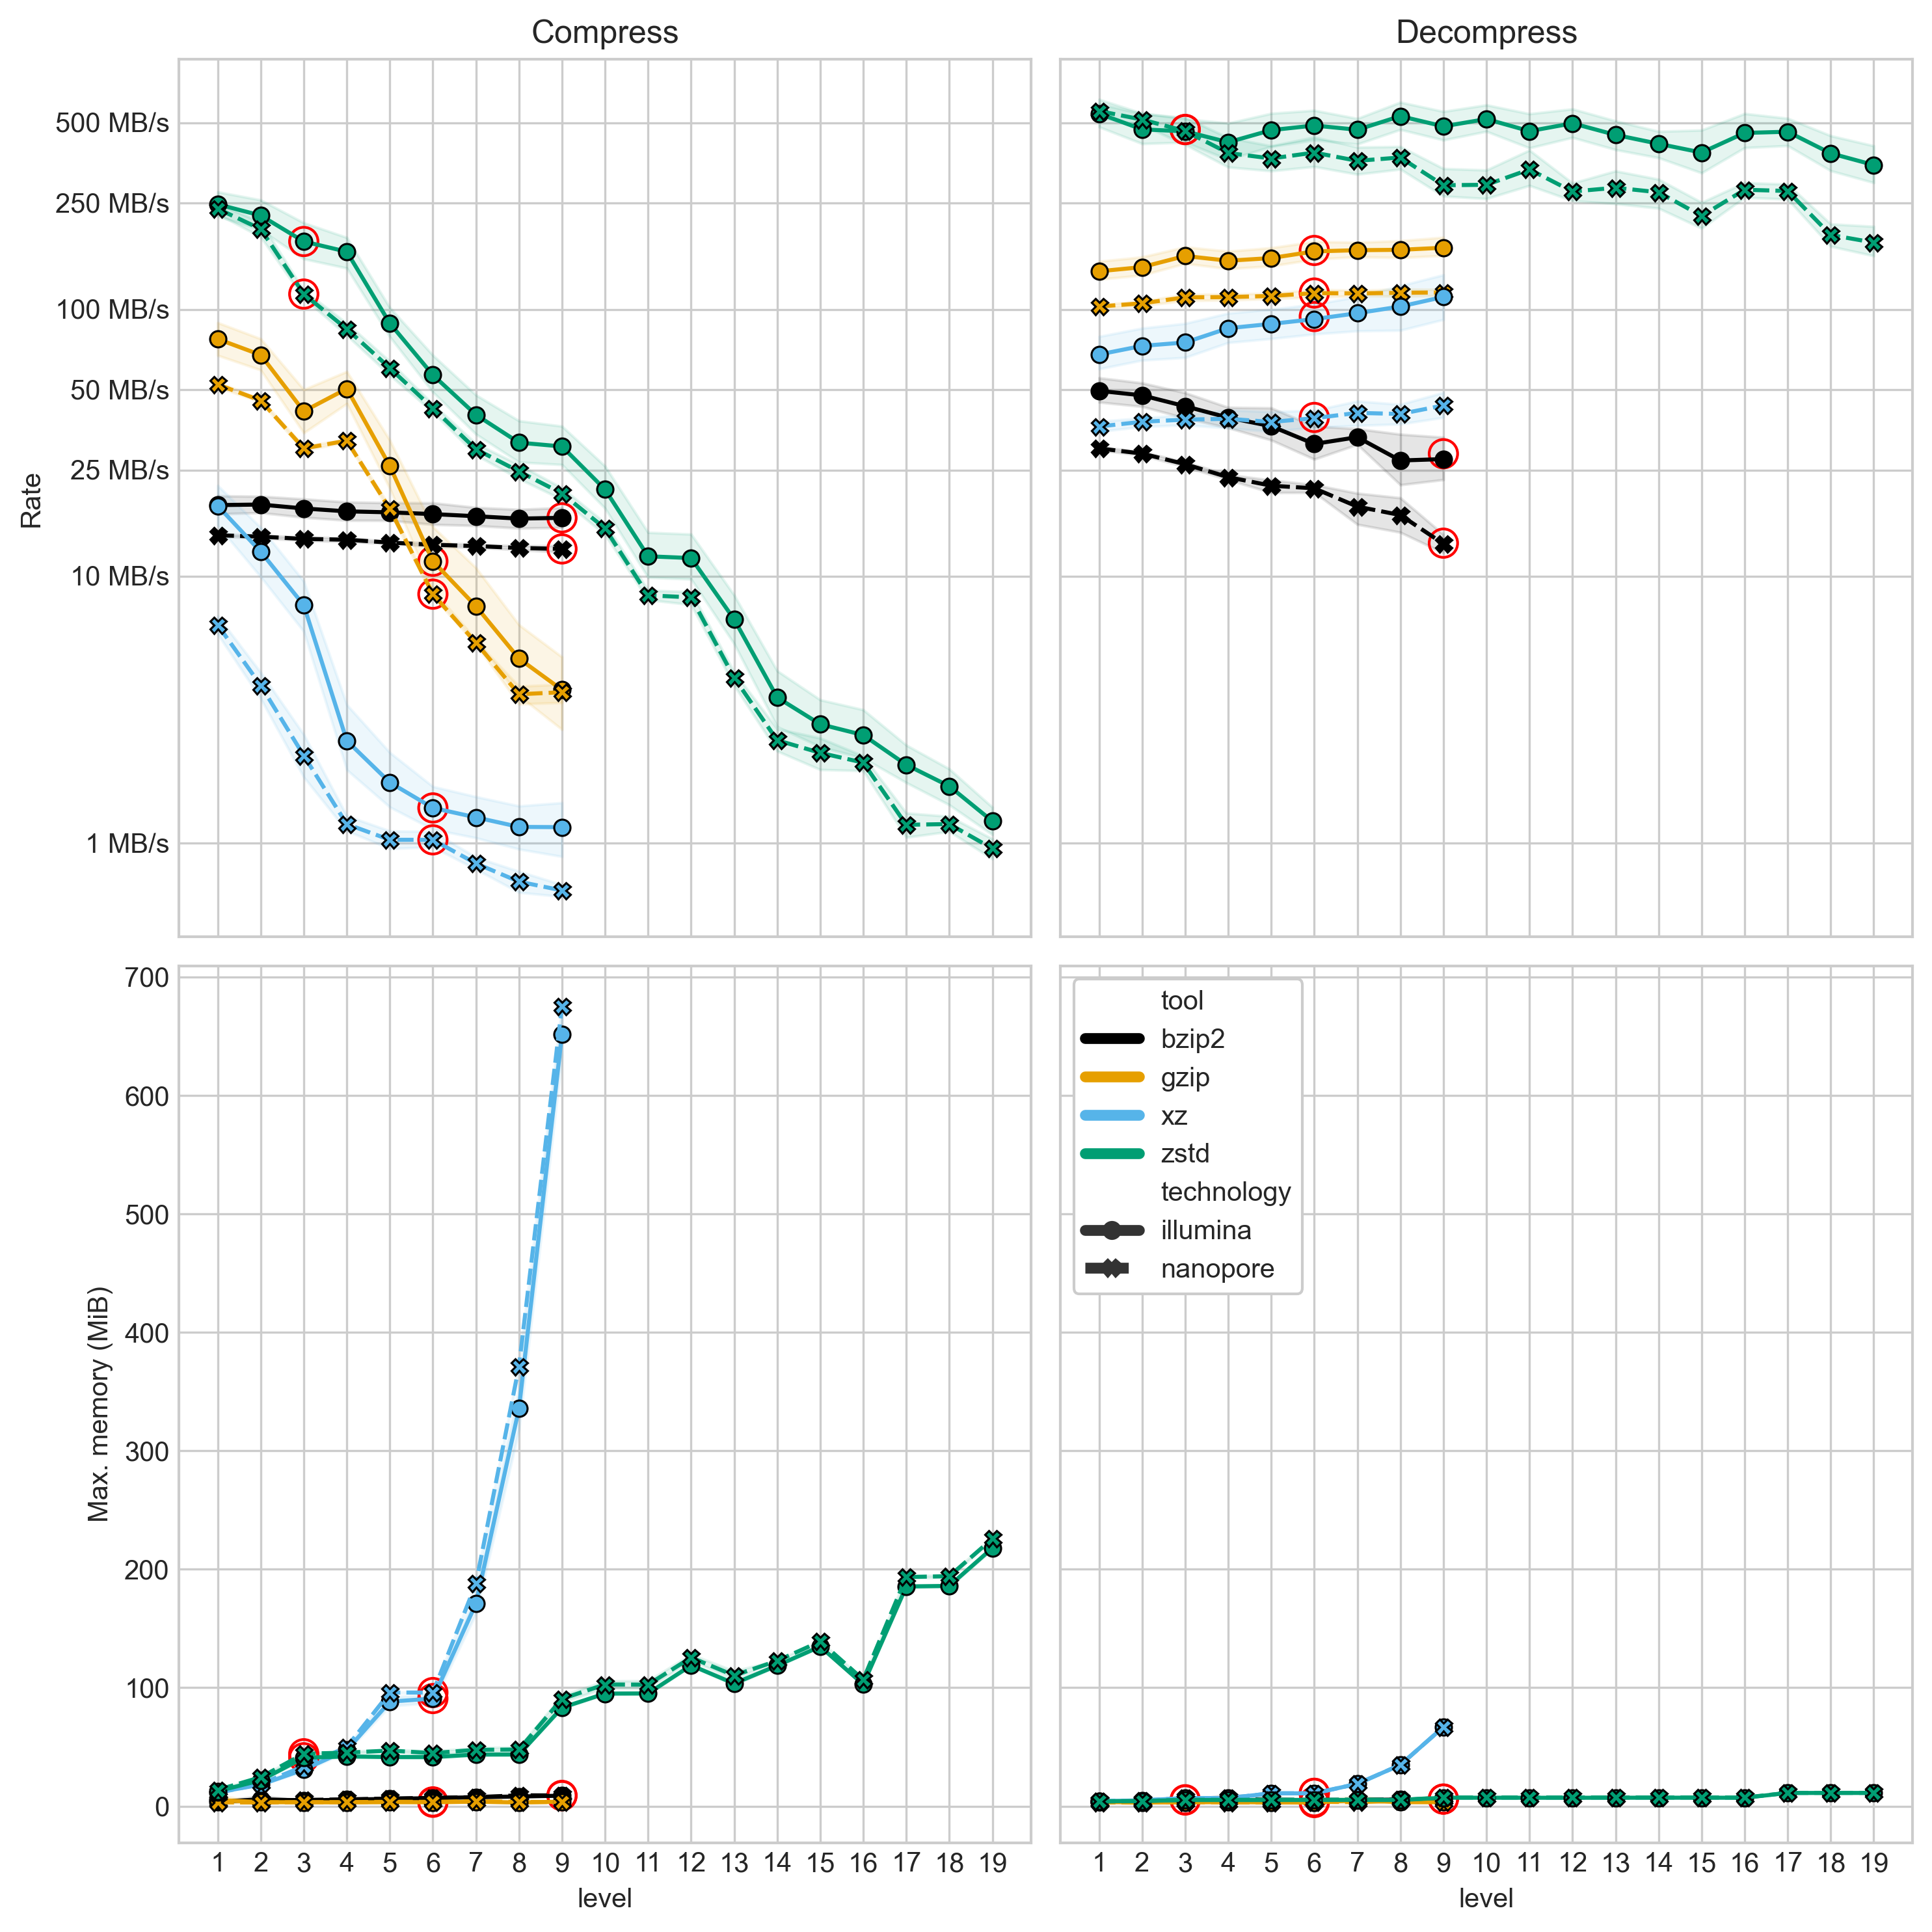

In [50]:
ys = ["compress_rate", "decompress_rate", "compress_max_rss", "decompress_max_rss"]
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=DPI, figsize=(10, 10), sharex=True, sharey="row", tight_layout=True)

for i, (y, ax) in enumerate(zip(ys, axes.flatten())):
    sns.lineplot(
        data=df, 
        x="level", 
        y=y, 
        hue="tool", 
        hue_order=hue_order,
        style="technology",
        style_order=style_order,
        palette=PALETTE,
        markers=True,
        ax=ax,
        mec="black",
        err_kws={"alpha": 0.1}
    )
    xticks = list(range(1, 20))
    _ = ax.set_xticks(xticks)
    
    if "rate" in y:
        ax.set_ylabel("Rate")
        ax.set_title(y.replace("_rate", "").capitalize())
        ax.set_yscale("log")
        KB = 1000
        MB = 1000 * KB
        yticks = [MB, 10*MB, 25*MB, 50*MB, 100*MB, 250*MB, 500*MB]
        ax.set_yticks(yticks)
        yticklabels = []
        for rate in yticks:
            rate, unit = format_size(rate).split()
            rate = round(float(rate))
            yticklabels.append(f"{rate} {unit}/s")
            
        ax.set_yticklabels(yticklabels)

        ax.legend(loc="upper right")
        
    else:
        ax.set_ylabel("Max. memory (MiB)")
        
    
    if y != "decompress_max_rss":
        ax.get_legend().remove()
    else:
        leg = ax.legend(loc="upper left", framealpha=1, frameon=True)
        # change the line width for the legend
        for line in leg.get_lines():
            line.set_linewidth(4.0)
        
    for (tool, lvl) in default_lvl.items():
        for t in set(df["technology"]):
            mean = df.query("tool==@tool and level==@lvl and technology==@t")[y].mean()
            ax.scatter(lvl, mean, s=110, fc='None', ec="red")

In [68]:
grpby = ["technology", "tool", "level"]
drop = ["size", "level", *grpby]
df.drop(columns=drop).groupby(by=grpby)["compress_ratio"].describe().at[("nanopore", "bzip2", 9), "mean"]

0.4107763275142228

In [69]:
df.drop(columns=drop).groupby(by=grpby)["compress_ratio"].describe().at[("nanopore", "gzip", 6), "mean"]

0.49392493830954276

In [70]:
0.49392493830954276/0.4107763275142228

1.2024182145511804